MNISTデータを用いて、手書き数字を識別機械学習モデルを構築、評価しなさい。

In [52]:
from sklearn.datasets import fetch_openml
minist = fetch_openml('mnist_784', version=1, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [83]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [153]:
x = minist.data
y = minist.target

y = np.asfarray(y, dtype = float)

# 訓練データと試験データに7:3に分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = 1)


#学習モデルの構築
model =  tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation = 'relu', input_shape=(784,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation(tf.keras.activations.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10)

#モデルの評価
model.evaluate(x_test, y_test)

Epoch 1/10
1532/1532 [==============================] - 8s 4ms/step - loss: 2.7847 - accuracy: 0.7513
Epoch 2/10
1532/1532 [==============================] - 7s 5ms/step - loss: 0.6093 - accuracy: 0.8388
Epoch 3/10
1532/1532 [==============================] - 6s 4ms/step - loss: 0.4846 - accuracy: 0.8697
Epoch 4/10
1532/1532 [==============================] - 6s 4ms/step - loss: 0.4393 - accuracy: 0.8840
Epoch 5/10
1532/1532 [==============================] - 7s 5ms/step - loss: 0.3984 - accuracy: 0.8958
Epoch 6/10
1532/1532 [==============================] - 7s 4ms/step - loss: 0.3761 - accuracy: 0.9025
Epoch 7/10
1532/1532 [==============================] - 7s 5ms/step - loss: 0.3575 - accuracy: 0.9080
Epoch 8/10
1532/1532 [==============================] - 6s 4ms/step - loss: 0.3565 - accuracy: 0.9091
Epoch 9/10
1532/1532 [==============================] - 8s 5ms/step - loss: 0.3453 - accuracy: 0.9117
Epoch 10/10
657/657 [==============================] - 1s 2ms/step - loss: 0.2790 

[0.2789989113807678, 0.9401904940605164]

上記の学習モデルでは、その精度はおよそ95%になった。
では、実際に一つの数値に対して文字認識をさせてみる。以下がその結果である。

1/1 [==============================] - 0s 65ms/step


6

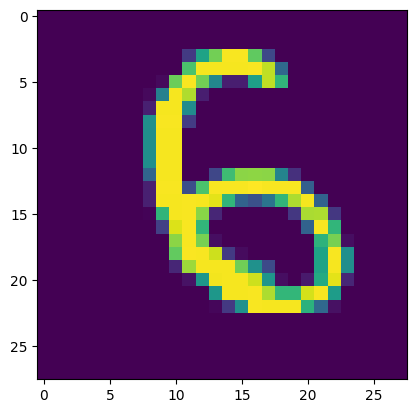

In [154]:
test_data = x_test[0]
test_data_image = test_data.reshape(28,28)
plt.imshow(test_data_image)

pred = model.predict(test_data[np.newaxis])
np.argmax(pred)

最後に、実際に手書きで書いた数字を認識できるか検証してみる。

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


以下の画像を認識させる。正しく認識できれば、出力は"2"になるはずだ。

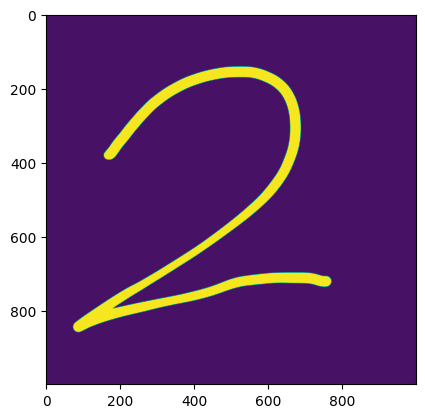

In [162]:
from PIL import Image
img = Image.open('drive/My Drive/Colab Notebooks/Data/Test.jpg').convert('L')
plt.imshow(img)

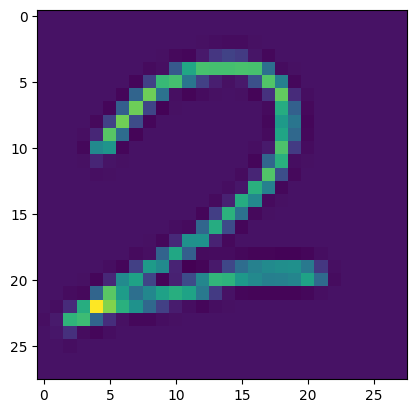

In [160]:
#画像を28*28に加工
img.thumbnail((28,28))
img_array = np.array(img)
test_data[np.newaxis].shape
plt.imshow(img)

In [161]:
img_array_flat = np.ravel(img_array)
pred = model.predict(img_array_flat[np.newaxis])
np.argmax(pred)

1/1 [==============================] - 0s 91ms/step


2

出力結果から、この学習モデルが効果的に機能していることがわかった。